# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

### 1.1 Search Method(BFS)

#### Build Graph

In [1]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from collections import defaultdict
import random
import warnings
warnings.filterwarnings('ignore')
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

#### Get data from source using regular expression

In [2]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location


In [3]:
city_info = get_city_info(coordination_source)

In [4]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

#### Compute distance between cities

In [5]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [6]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

get_city_distance("广州","北京")

857.9695222184339

#### Draw the graph

In [7]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [8]:
city_graph = nx.Graph()

city_graph.add_nodes_from(list(city_info.keys()))

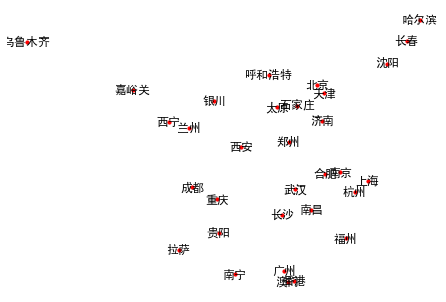

In [9]:
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

#### Bulid connection between.

Let's assume that two cities are connected if their distance is less than 700 km.

In [10]:
threshold = 700

In [11]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)


In [12]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

#### Draw connection graph

In [13]:
cities_connection_graph = nx.Graph(cities_connection)

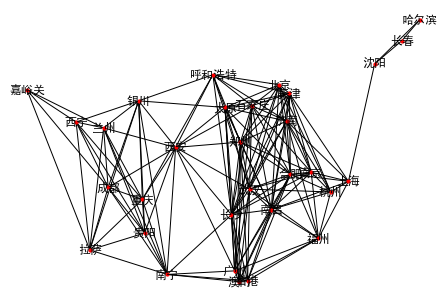

In [14]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

#### BFS 1 version

In [15]:
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter  = path[-1]
#         print('path:{}'.format(path))
#         print('forniter:{}'.format(froniter))
        if froniter in visited: continue
            
        successors = graph[froniter]
        
        for city in successors:
            if city in path: continue
            
            new_path = path+[city]
#             print('new_pvath:{}'.format(new_path))
            
            pathes.append(new_path)
#             print('pathes:{}'.format(pathes))

            if city == destination:
                return new_path
        visited.add(froniter)

        

In [16]:
search_1(cities_connection,'上海','香港')

['上海', '合肥', '香港']

#### Optimal search using variation of BFS
1. All costs between two nodes are positive or zero
2. Sort the list used to maintain the searching history in every iteration

In [38]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        successors  =graph[froniter]
        
        for city in successors:
            if city in path: continue
                
            new_path = path+[city]
            
            pathes.append(new_path)
        pathes = search_strategy(pathes)
        
        if pathes and (destination == pathes[0][-1]):
            return pathes[0]
        
def sort_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)

def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance +=get_city_distance(path[i],path[i+1])
    return distance

In [39]:
search_2(cities_connection,'广州','北京',search_strategy=lambda x:x)

['广州', '石家庄', '北京']

In [32]:
search_2(cities_connection,'广州','北京',search_strategy=sort_by_distance)

['广州', '武汉', '北京']

In [42]:
get_distance_of_path(['广州', '石家庄', '北京'])

919.2125907610059

In [43]:
get_distance_of_path(['广州', '武汉', '北京'])

857.9753762158153

### 1.2 Machine Learing(Gradient Descent)

In [71]:
from sklearn.datasets import load_boston
import random


In [72]:
dataset = load_boston()

In [73]:
x,y = dataset['data'],dataset['target']

In [74]:
x.shape

(506, 13)

In [75]:
y.shape

(506,)

In [76]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [77]:
X_rm = x[:,5]

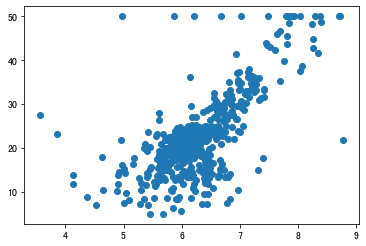

In [78]:
plt.scatter(X_rm,y)

#### assume that target function is a linear function
$$ y= k*rm +b $$

In [79]:
def price(rm, k, b):
    return k * rm + b

#### Define mean square loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [80]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

#### Define partial derivatives

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$


In [81]:
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [82]:
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 236417.99896017238, parameters k is 95.47598524421122 and b is -95.1103462709329
Iteration 1, the loss is 199271.7835732443, parameters k is 89.3276024491405 and b is -96.07512328580692
Iteration 2, the loss is 167964.67962905363, parameters k is 83.68308554637709 and b is -96.9606900707702
Iteration 3, the loss is 141578.82174288784, parameters k is 78.50114040780802 and b is -97.77353827210936
Iteration 4, the loss is 119340.62621959209, parameters k is 73.7438571491536 and b is -98.5196275158234
Iteration 5, the loss is 100598.11103285129, parameters k is 69.37643277561101 and b is -99.20442900913459
Iteration 6, the loss is 84801.78093696664, parameters k is 65.3669165579639 and b is -99.8329655686549
Iteration 7, the loss is 71488.51729851165, parameters k is 61.685976276291534 and b is -100.40984836806004
Iteration 8, the loss is 60268.00032799632, parameters k is 58.30668362108169 and b is -100.9393106741224
Iteration 9, the loss is 50811.26563687894, pa

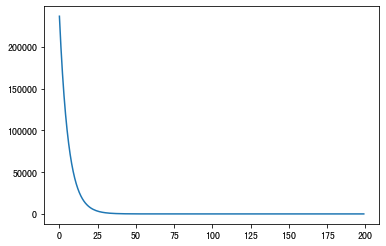

In [83]:
plt.plot(list(range(iteration_num)),losses)

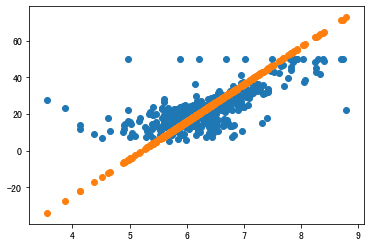

In [84]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

Ans：
* All costs between two nodes are postive or zero
* Sort the list used to maintain the searching history in every iteration

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

Ans : We must make DFS return all solutions if we want to find the optimal way.

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

Ans: Choice BFS if to be finding the optimal solution in sufficient memory

##### 2.4 When can we use machine learning ?

Ans:


##### 2.5 What is the gradient of a function ?

Ans:
$$ \frac{\partial{loss}}{\partial{\theta}} = \frac{2}{n}\sum(y_i - \hat{y_i})x_i$$


##### 2.6 How can we find the maximum value of a function using the information of gradient ?

Ans: 

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [1]:
import json
import re
import math
import pandas as pd
import numpy as np
import os
import networkx as nx
from collections import defaultdict
from emoji import emojize
import requests
from bs4 import BeautifulSoup
import urllib

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
def get_metro_data():
    url = 'http://map.amap.com/service/subway?_1469083453978&srhdata=4401_drw_guangzhou.json'
    req_url = urllib.request.urlopen(url)
    data = json.loads(req_url.read().decode('utf8'))
    return data

def get_metro_data_local(path):
    data = json.loads(open(data_path).read())
    return data
def metro_process(metro_data):
    lst_line = []
    for line_i in metro_data['l']:
        df_line = pd.DataFrame(line_i['st'])
        df_line['ln'] = line_i['ln']
        lst_line.append(df_line)
    return pd.concat(lst_line,ignore_index=True)

In [3]:
# data_path = os.path.join(os.getcwd(),'datasets','Guangzhou_subway.txt')
# gz_metro = get_metro_data_local(data_path)
gz_metro = get_metro_data()
gz_metro = metro_process(gz_metro)

In [4]:
gz_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 17 columns):
lg       273 non-null object
n        273 non-null object
p        273 non-null object
poiid    273 non-null object
r        273 non-null object
rs       273 non-null object
si       273 non-null object
sid      273 non-null object
sl       273 non-null object
sp       273 non-null object
su       273 non-null object
t        273 non-null object
udli     273 non-null object
udpx     273 non-null object
udsi     273 non-null object
udsu     273 non-null object
ln       273 non-null object
dtypes: object(17)
memory usage: 36.3+ KB


In [5]:
gz_metro[['n','sl','p']].drop_duplicates().shape

(235, 3)

In [6]:
gz_metro.head()

,lg,n,p,poiid,r,rs,si,sid,sl,sp,su,t,udli,udpx,udsi,udsu,ln
0,4,西塱,435 975,BV10024397,440100023049|440100023043,435 975|435 975,440100023043015,440100023043015,"113.231978,23.065437",xi ?,1,1,440100023049;440100023050,432 975;438 975,440100023049017;440100023050002,1;1,1号线
1,2,坑口,435 939,BV10021881,440100023049,435 939,440100023049016,440100023049016,"113.232498,23.078878",keng kou,1,0,440100023050;440100023049,438 939;432 939,440100023050003;440100023049016,1;1,1号线
2,2,花地湾,434 905,BV10024404,440100023049,434 905,440100023049015,440100023049015,"113.234030,23.087055",hua di wan,1,0,440100023049;440100023050,431 905;437 905,440100023049015;440100023050004,1;1,1号线
3,2,芳村,434 874,BV10013608,440100023049,434 874,440100023049014,440100023049014,"113.235703,23.098592",fang cun,1,0,440100023049;440100023050,431 874;437 874,440100023049014;440100023050005,1;1,1号线
4,5,黄沙,434 843,BV10015729,440100023049|440100023053,434 843|434 843,440100023049013,440100023049013,"113.239856,23.110524",huang sha,1,1,440100023049;440100023050,431 843;437 843,440100023049013;440100023050006,1;1,1号线


In [7]:
gz_metro['p'][0].split()

['435', '975']

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [8]:
def build_st_connection(metro):
    df_line = metro.groupby(['ln'])['n'].apply(list).reset_index()
#     dic_stations = set(df_line['n'].sum())
    
    stations_connection = defaultdict(list)
#     for st_i in dic_stations:
#         stations_connection[st_i] = []
        
    for index_i,row_i in df_line.iterrows():
        for i in range(len(row_i['n'])):
            if i == 0:
                stations_connection[row_i['n'][i]].append(row_i['n'][i+1])
            elif i == len(row_i['n'])-1:
                stations_connection[row_i['n'][i]].append(row_i['n'][i-1])
            else:
                stations_connection[row_i['n'][i]].append(row_i['n'][i-1])
                stations_connection[row_i['n'][i]].append(row_i['n'][i+1])
            stations_connection[row_i['n'][i]] = list(set(stations_connection[row_i['n'][i]]))
    return stations_connection
gz_st_connection = build_st_connection(gz_metro)

In [9]:
gz_st_connection

defaultdict(list,
            {'鱼珠': ['三溪', '裕丰围', '大沙地'],
             '裕丰围': ['鱼珠', '双岗'],
             '双岗': ['裕丰围', '南海神庙'],
             '南海神庙': ['夏园', '双岗'],
             '夏园': ['南岗', '南海神庙'],
             '南岗': ['沙村', '夏园'],
             '沙村': ['南岗', '白江'],
             '白江': ['沙村', '新塘'],
             '新塘': ['白江', '官湖'],
             '官湖': ['新沙', '新塘'],
             '新沙': ['官湖'],
             '嘉禾望岗': ['白云大道北', '白云东平', '龙归', '黄边'],
             '白云东平': ['夏良', '嘉禾望岗'],
             '夏良': ['白云东平', '太和'],
             '太和': ['竹料', '夏良'],
             '竹料': ['太和', '钟落潭'],
             '钟落潭': ['竹料', '马沥'],
             '马沥': ['钟落潭', '新和'],
             '新和': ['红卫', '马沥', '太平'],
             '太平': ['神岗', '新和'],
             '神岗': ['赤草', '太平'],
             '赤草': ['神岗', '从化客运站'],
             '从化客运站': ['东风', '赤草'],
             '东风': ['从化客运站'],
             '红卫': ['新南', '新和'],
             '新南': ['枫下', '红卫'],
             '枫下': ['知识城', '新南'],
             '知识城': ['何棠下', '枫下'],
        

In [10]:
def get_st_info(metro):
    location = defaultdict(tuple)
    coordinate = defaultdict(tuple)
    df_metro = metro[['n','sl','p']].drop_duplicates()
    for index_i,row_i in df_metro.iterrows():
        location[row_i['n']] = tuple(map(float,row_i['sl'].split(',')))
        x = float(row_i['p'].split()[0])
        y = 0-float(row_i['p'].split()[1])
        coordinate[row_i['n']] = (x,y)
    return location,coordinate

In [11]:
gz_st_location,gz_st_coordinate = get_st_info(gz_metro)

C:\Users\qiu.hq.1\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\qiu.hq.1\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


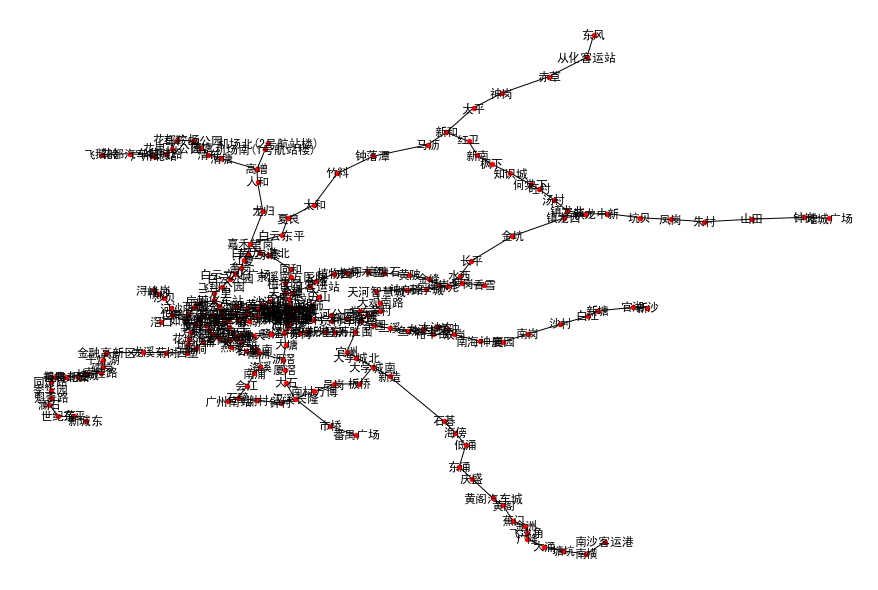

In [12]:
gz_st_graph = nx.Graph(gz_st_connection)

gz_st_graph.add_nodes_from(list(gz_st_connection.keys()))
plt.figure(figsize=(12,8))
nx.draw(gz_st_graph, gz_st_location, with_labels=True, node_size=20)

C:\Users\qiu.hq.1\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\qiu.hq.1\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


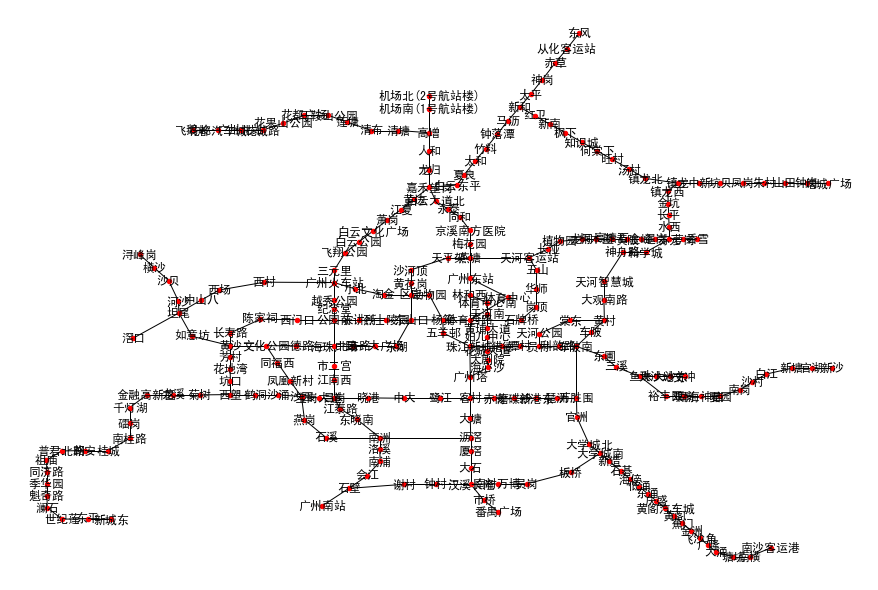

In [13]:
gz_st_graph = nx.Graph(gz_st_connection)

gz_st_graph.add_nodes_from(list(gz_st_connection.keys()))
plt.figure(figsize=(12,8))
nx.draw(gz_st_graph, gz_st_coordinate, with_labels=True, node_size=20)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [14]:
def BFS_search(st_connection,start,end):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        st_path = pathes.pop(0)
        frontier = st_path[-1]
        
        if frontier in visited: continue 
            
        sub_st = st_connection[frontier]
        
        for st_i in sub_st:
            if st_i in st_path: continue
            new_st_path = st_path+[st_i]
            pathes.append(new_st_path)
#             print('pathes:{}'.format(pathes))
            if st_i == end:
                return new_st_path
        visited.add(frontier)
                

In [15]:
BFS_search(gz_st_connection,'大学城北','钟落潭')

['大学城北',
 '官洲',
 '万胜围',
 '车陂南',
 '科韵路',
 '员村',
 '潭村',
 '猎德',
 '珠江新城',
 '体育西路',
 '林和西',
 '广州东站',
 '燕塘',
 '梅花园',
 '京溪南方医院',
 '同和',
 '永泰',
 '白云大道北',
 '嘉禾望岗',
 '白云东平',
 '夏良',
 '太和',
 '竹料',
 '钟落潭']

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

In [16]:
def geo_distance(origin, destination):

    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_st_distance(st1,st2):
    return geo_distance(gz_st_location[st1],gz_st_location[st2])

def sort_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)

def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_st_distance(path[i],path[i+1])
    return distance



In [18]:
def BFS_search_optimal(st_connection,start,end,search_strategy):
    pathes = [[start]]
    
    while pathes:
        st_path = pathes.pop(0)
        frontier = st_path[-1]
            
        sub_st = st_connection[frontier]

        for st_i in sub_st:
            if st_i in st_path: continue
            new_st_path = st_path+[st_i]
            pathes.append(new_st_path)
#             print('pathes:{}'.format(pathes))
        pathes = search_strategy(pathes)
        if pathes and pathes[0][-1]==end:
            return pathes[0]

In [37]:
BFS_search_optimal(gz_st_connection,'动物园','官洲',sort_by_distance)

['动物园',
 '杨箕',
 '五羊邨',
 '珠江新城',
 '广州塔',
 '客村',
 '赤岗',
 '磨碟沙',
 '新港东',
 '琶洲',
 '万胜围',
 '官洲']

In [20]:
BFS_search_optimal(gz_st_connection,'天河客运站','广州南站',lambda x:x)

['天河客运站',
 '燕塘',
 '广州东站',
 '林和西',
 '体育西路',
 '珠江新城',
 '广州塔',
 '客村',
 '大塘',
 '沥滘',
 '南洲',
 '洛溪',
 '南浦',
 '会江',
 '石壁',
 '广州南站']

In [21]:
get_distance_of_path(['天河客运站', '燕塘', '广州东站', '林和西', '体育西路'])

3.324970845302794

In [22]:
get_distance_of_path(['天河客运站', '五山', '华师', '岗顶', '石牌桥','体育西路'])

4.822215707308696

b. Find the path that requires minimum transfers between two stations.


In [25]:
gz_st_line = gz_metro.groupby('n')['ln'].apply(list).to_dict()
gz_line_st = gz_metro.groupby('ln')['n'].apply(list).to_dict()

In [35]:
def count_transfer(path):
    transfer_num = 0
    for i in range(1,len(path)-1):
        before_st_line = gz_st_line[path[i-1]]
        after_st_line = gz_st_line[path[i+1]]
        same_st_line = [st_i for st_i in before_st_line if st_i in after_st_line]
        if len(same_st_line)<1:
            transfer_num +=1
    return transfer_num

def sort_by_transfer(pathes):
    return sorted(pathes,key=count_transfer)

In [39]:
count_transfer(['动物园', '杨箕', '五羊邨', '珠江新城', '广州塔', '客村', '赤岗'])

2

In [44]:
BFS_search_optimal(gz_st_connection,'动物园','官洲',sort_by_transfer)

['动物园', '杨箕', '五羊邨', '珠江新城', '猎德', '潭村', '员村', '科韵路', '车陂南', '万胜围', '官洲']

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [45]:
BFS_search_optimal(gz_st_connection,'天河客运站','广州南站',sort_by_distance)

['天河客运站',
 '燕塘',
 '广州东站',
 '林和西',
 '体育中心南',
 '天河南',
 '黄埔大道',
 '妇儿中心',
 '花城大道',
 '大剧院',
 '海心沙',
 '广州塔',
 '客村',
 '大塘',
 '沥滘',
 '南洲',
 '洛溪',
 '南浦',
 '会江',
 '石壁',
 '广州南站']

In [48]:
BFS_search_optimal(gz_st_connection,'天河客运站','广州南站',sort_by_transfer)

['天河客运站',
 '五山',
 '华师',
 '岗顶',
 '石牌桥',
 '体育西路',
 '珠江新城',
 '广州塔',
 '客村',
 '大塘',
 '沥滘',
 '厦滘',
 '大石',
 '汉溪长隆',
 '钟村',
 '谢村',
 '石壁',
 '广州南站']

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 